In [1]:
import pandas as pd
df = pd.read_csv('/content/Flipkart_mobile_brands_scraped_data.csv', usecols=['Brand','Memory'])
df['Memory'] = df['Memory'].str.replace(' ','')
df['Memory'] = df['Memory'].str.replace('512MB','0.5GB')
df = df.dropna()
df = df.drop_duplicates()
df

,Brand,Memory
0,OPPO,4GB
2,OPPO,6GB
7,OPPO,3GB
15,OPPO,8GB
21,OPPO,2GB
...,...,...
2483,Xiaomi,8GB
2486,Xiaomi,6GB
2513,Xiaomi,4GB
2522,Xiaomi,2GB


In [2]:
import networkx as nx
from networkx.algorithms import bipartite
B = nx.Graph()
Brand = df['Brand']
Memory = df['Memory']
print("Brand ",Brand.nunique())
print("Memory",Memory.nunique())
print("Số cạnh", len(df))

Brand  16
Memory 28
Số cạnh 122


In [3]:
df_count = df['Brand'].value_counts().reset_index()

In [4]:
df_count.columns = ['Brand', 'count']

In [5]:
df_count = df_count[df_count['count'] >= 1]

In [6]:
df_count

,Brand,count
0,SAMSUNG,25
1,Nokia,14
2,LG,9
3,ASUS,9
4,GIONEE,9
5,Motorola,8
6,OPPO,7
7,Lenovo,7
8,realme,6
9,vivo,6


In [7]:
df_count = df_count.sort_values('count')

In [8]:
df_count

,Brand,count
15,IQOO,2
13,HTC,3
14,Google Pixel,3
12,POCO,4
10,Apple,5
11,Xiaomi,5
8,realme,6
9,vivo,6
6,OPPO,7
7,Lenovo,7


In [9]:
df_count = df_count.sort_values('count').head(10)

In [10]:
df_count

,Brand,count
15,IQOO,2
13,HTC,3
14,Google Pixel,3
12,POCO,4
10,Apple,5
11,Xiaomi,5
8,realme,6
9,vivo,6
6,OPPO,7
7,Lenovo,7


In [11]:
df = df[df['Brand'].isin(df_count['Brand'])]

In [12]:
df

,Brand,Memory
0,OPPO,4GB
2,OPPO,6GB
7,OPPO,3GB
15,OPPO,8GB
21,OPPO,2GB
48,OPPO,12GB
115,OPPO,1GB
244,HTC,6GB
245,HTC,3GB
246,HTC,4GB


In [13]:
import networkx as nx
from networkx.algorithms import bipartite
B = nx.Graph()
Brand = df['Brand']
Memory = df['Memory']
print("Brand ",Brand.nunique())
print("Memory",Memory.nunique())
print("Số cạnh", len(df))

Brand  10
Memory 9
Số cạnh 48


In [14]:
for index, row in df.iterrows():
  B.add_edge(row['Brand'], row['Memory'],weight=1)
B.add_nodes_from(Memory,bipartite = 0)
B.add_nodes_from(Brand,bipartite = 1)

In [17]:
G = bipartite.weighted_projected_graph(B, Brand)


In [18]:
print(G.nodes())

['OPPO', 'HTC', 'IQOO', 'Google Pixel', 'realme', 'Apple', 'Lenovo', 'POCO', 'vivo', 'Xiaomi']


In [19]:
print(G.edges())

[('OPPO', 'Xiaomi'), ('OPPO', 'Google Pixel'), ('OPPO', 'HTC'), ('OPPO', 'realme'), ('OPPO', 'POCO'), ('OPPO', 'IQOO'), ('OPPO', 'Lenovo'), ('OPPO', 'vivo'), ('OPPO', 'Apple'), ('HTC', 'Xiaomi'), ('HTC', 'Google Pixel'), ('HTC', 'realme'), ('HTC', 'POCO'), ('HTC', 'Lenovo'), ('HTC', 'vivo'), ('HTC', 'Apple'), ('IQOO', 'Xiaomi'), ('IQOO', 'realme'), ('IQOO', 'POCO'), ('IQOO', 'vivo'), ('Google Pixel', 'Xiaomi'), ('Google Pixel', 'realme'), ('Google Pixel', 'POCO'), ('Google Pixel', 'Lenovo'), ('Google Pixel', 'vivo'), ('Google Pixel', 'Apple'), ('realme', 'Xiaomi'), ('realme', 'POCO'), ('realme', 'Lenovo'), ('realme', 'vivo'), ('realme', 'Apple'), ('Apple', 'Xiaomi'), ('Apple', 'POCO'), ('Apple', 'Lenovo'), ('Apple', 'vivo'), ('Lenovo', 'Xiaomi'), ('Lenovo', 'POCO'), ('Lenovo', 'vivo'), ('POCO', 'Xiaomi'), ('POCO', 'vivo'), ('vivo', 'Xiaomi')]


In [20]:
labels = nx.get_edge_attributes(G,'weight')
df2 = pd.DataFrame(columns=['source', 'target', 'weight'])
for key, value in labels.items():
  df2 =df2.append({'source':key[0],'target':key[1],'weight':value}, ignore_index=True)
df2.to_csv(r'get_10_nodes.csv', index = False, header=True)

<Figure size 864x864 with 0 Axes>

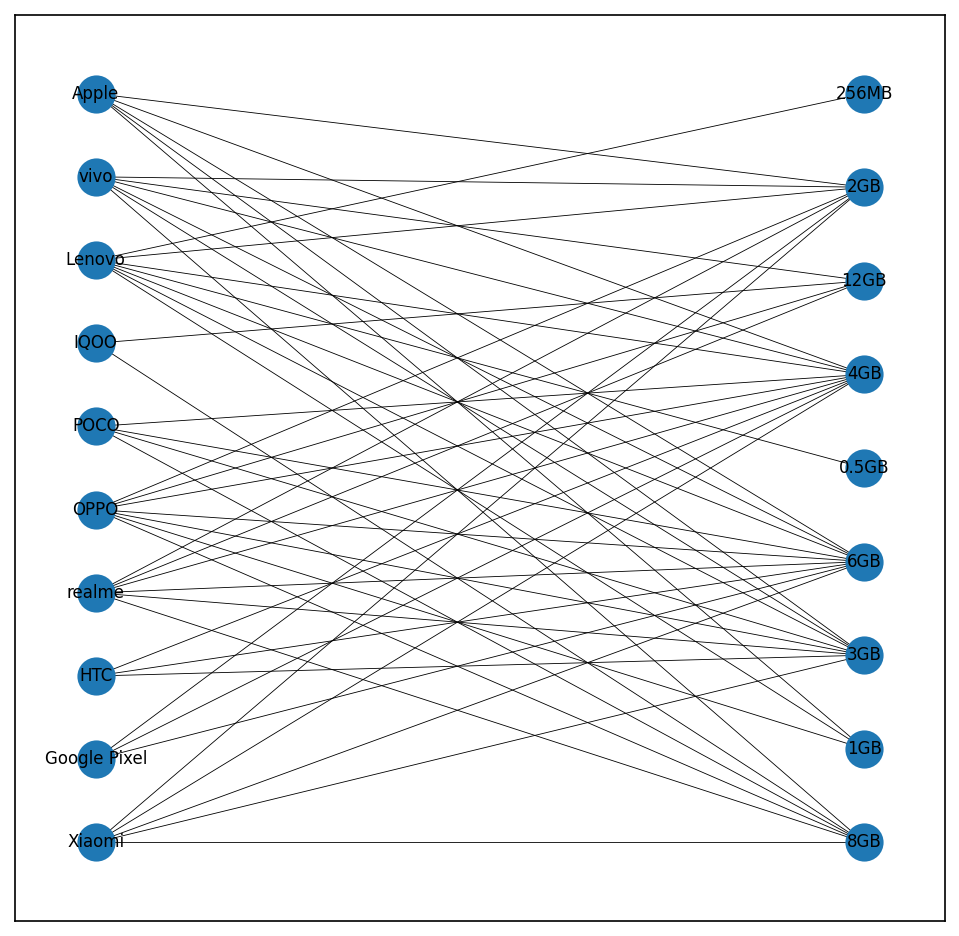

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1,1, figsize=(8,8), dpi=150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B,Brand),font_size=8,width=0.4)

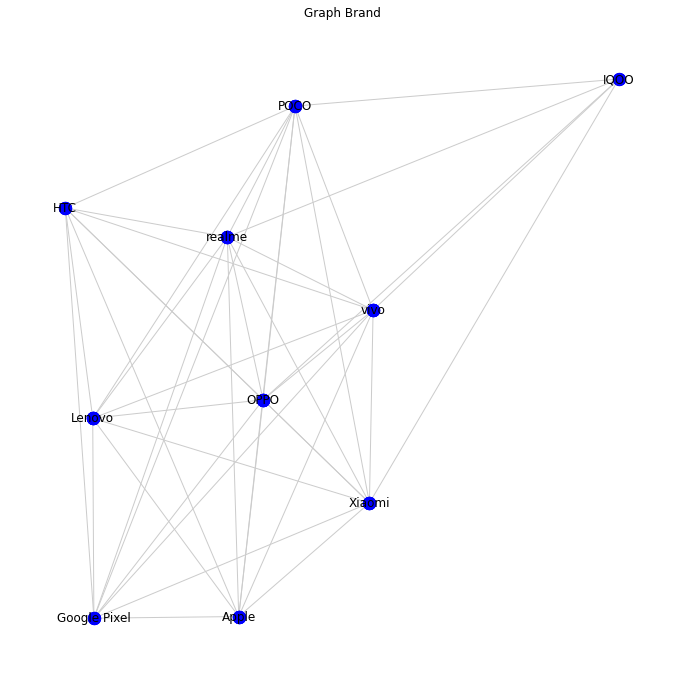

In [22]:
G = bipartite.weighted_projected_graph(B,Brand)
plt.figure(figsize=(12,12))

layout = nx.spring_layout(G)

nx.draw_networkx_nodes(G,
                       layout,
                       nodelist=Brand,
                       node_size=150,
                       node_color='blue')
nx.draw_networkx_edges(G, layout, edge_color="#cccccc")
node_labels = dict(zip(Brand, Brand))
nx.draw_networkx_labels(G, layout, labels=node_labels)
plt.axis('off')

plt.title("Graph Brand")

plt.show()

# Thuật toán xếp hạng

## Page Rank

In [23]:
page_rank = nx.pagerank(G)
for node in sorted(page_rank, key=page_rank.get, reverse=True):
  print(node, page_rank[node])

OPPO 0.13053392505105438
vivo 0.1246616560723896
realme 0.12466165607238958
Xiaomi 0.1148781141122671
Apple 0.10501508936206079
Lenovo 0.10501508936206079
POCO 0.09719743154611513
HTC 0.08153124204091138
Google Pixel 0.0785379864429354
IQOO 0.03796780993781593


## Closeness centrality

In [24]:
closeness_centraliy = nx.closeness_centrality(G)
for node in sorted(closeness_centraliy, key=closeness_centraliy.get, reverse=True):
  print(node, closeness_centraliy[node])

OPPO 1.0
realme 1.0
POCO 1.0
vivo 1.0
Xiaomi 1.0
HTC 0.9
Google Pixel 0.9
Apple 0.9
Lenovo 0.9
IQOO 0.6923076923076923


## Betweenness centraliy

In [25]:
betweenness_centraliy = nx.betweenness_centrality(G)
for node in sorted(betweenness_centraliy, key=betweenness_centraliy.get, reverse=True):
  print(node, betweenness_centraliy[node])

OPPO 0.02222222222222222
realme 0.02222222222222222
POCO 0.02222222222222222
vivo 0.02222222222222222
Xiaomi 0.02222222222222222
HTC 0.0
IQOO 0.0
Google Pixel 0.0
Apple 0.0
Lenovo 0.0


# Thuật toán phân cụm

## Louvain

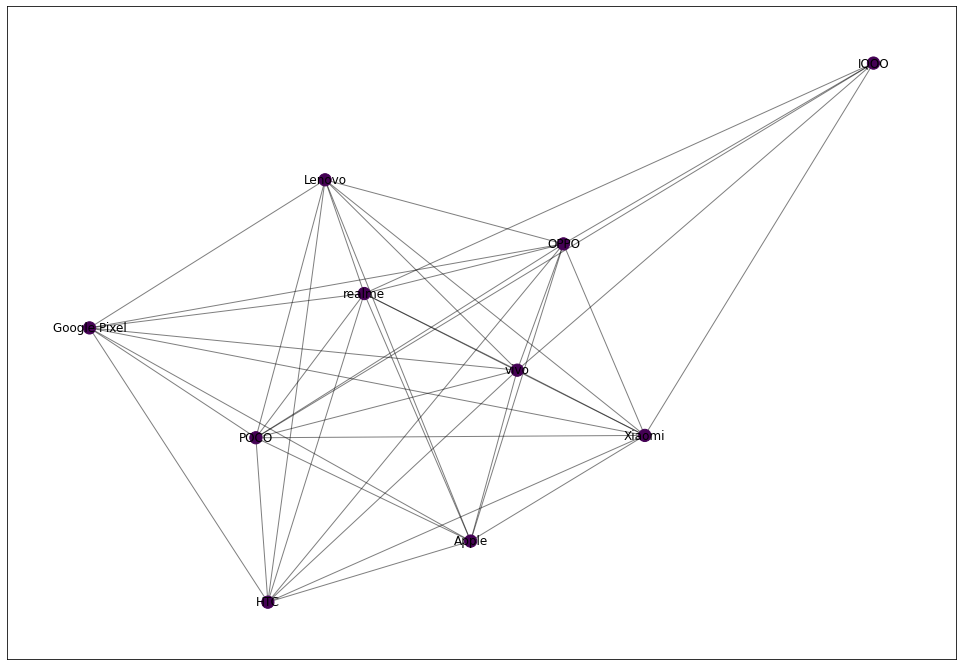

In [26]:
import matplotlib.cm as cm
import matplotlib
import community.community_louvain as community_louvain

plt.figure(figsize=(17, 12))

partition = community_louvain.best_partition(G)

pos = nx.spring_layout(G)

cmap= cm.get_cmap('viridis', max(partition.values()) +1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=150,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.show()

In [27]:
import numpy as np
values = list(partition.values())

print('Số cụm', len(np.unique(values)))

for i in range(len(np.unique(values))):
  print("-- Cụm ", i+1, " --")
  for name, k in partition.items():
    if k ==i:
      print(name)

Số cụm 1
-- Cụm  1  --
OPPO
HTC
IQOO
Google Pixel
realme
Apple
Lenovo
POCO
vivo
Xiaomi


# Girvan newman

[['Xiaomi', 'Google Pixel', 'HTC', 'realme', 'OPPO', 'POCO', 'Lenovo', 'vivo', 'Apple'], ['IQOO']]


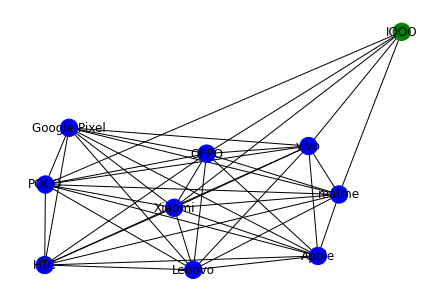

In [28]:
from networkx.algorithms.community.centrality import girvan_newman

communities = girvan_newman(G)

node_groups = []
for com in next(communities):
  node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

# Kmeans

In [29]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
k = preprocessing.LabelEncoder()
df2 = df.copy()

In [30]:
# Chuyển cột Brand  thành cột có giá trị số tương ứng
k.fit(df2['Brand'])
df2['BrandNum'] = k.transform(df2['Brand']) 
df2['BrandNum'].drop_duplicates()

0       5
244     2
249     3
254     1
495     8
1121    0
2180    4
2406    6
2426    9
2483    7
Name: BrandNum, dtype: int64

In [31]:
# Chuyển cột Memory thành cột có giá trị số tương ứng
k.fit(df2['Memory'])
df2['MemoryNum'] = k.transform(df2['Memory']) 
df2['MemoryNum'].drop_duplicates()

0       6
2       7
7       5
15      8
21      4
48      1
115     2
2186    3
2251    0
Name: MemoryNum, dtype: int64

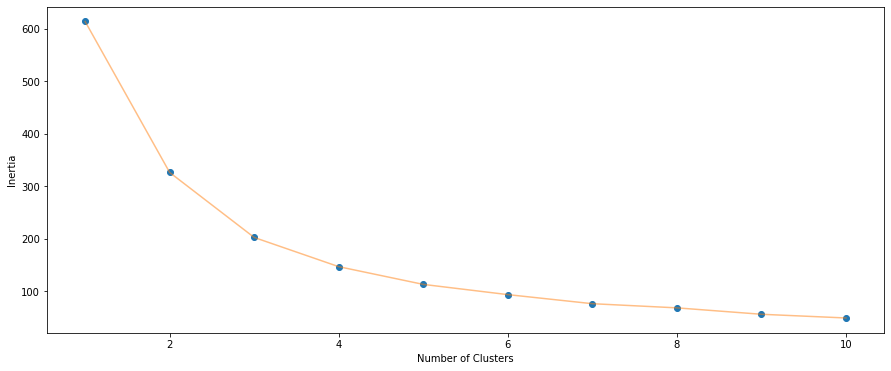

In [32]:
X = df2[['MemoryNum', 'BrandNum']].iloc[:,:].values
inertia=[]
for n in range (1,11):
    algorithm = KMeans(n_clusters =n, init='random')
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-',alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

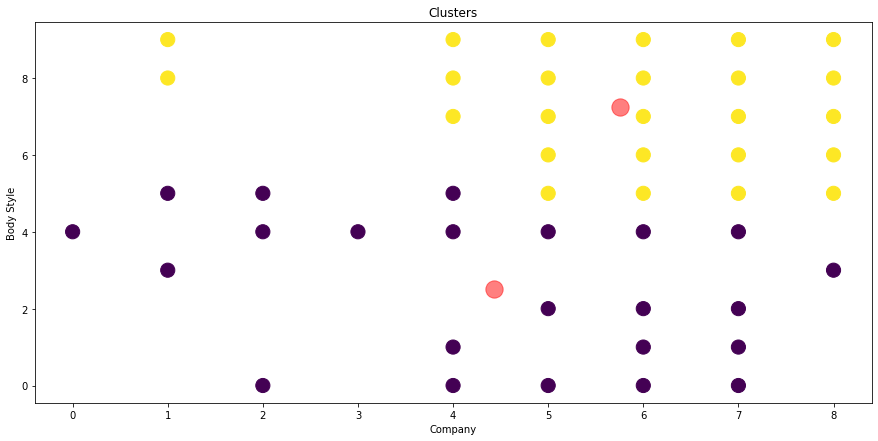

Toạ độ trung tâm cụm:  [[4.43478261 2.52173913]
 [5.76       7.24      ]]


In [33]:
algorithm = KMeans(n_clusters =2, init='random')
algorithm.fit(X)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

#Biểu diễn kết quả gom cụm
plt.figure(1, figsize = (15,7))
plt.clf()
plt.scatter(x='MemoryNum', y='BrandNum', data=df2, s=200, c=labels1)
plt.scatter(centroids1[:,0], centroids1[:,1], s=300, c='red', alpha=0.5)
plt.xlabel('Company'), plt.ylabel('Body Style')
plt.title('Clusters')
plt.show()

print('Toạ độ trung tâm cụm: ',centroids1)

In [34]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df2[['BrandNum', 'MemoryNum' ]])
df2['cluster']= y_predicted
df2

,Brand,Memory,BrandNum,MemoryNum,cluster
0,OPPO,4GB,5,6,0
2,OPPO,6GB,5,7,0
7,OPPO,3GB,5,5,0
15,OPPO,8GB,5,8,0
21,OPPO,2GB,5,4,1
48,OPPO,12GB,5,1,1
115,OPPO,1GB,5,2,1
244,HTC,6GB,2,7,1
245,HTC,3GB,2,5,1
246,HTC,4GB,2,6,1


In [35]:
df_1= df2[df2.cluster == 0]
df_2= df2[df2.cluster == 1]

In [36]:
df_1

,Brand,Memory,BrandNum,MemoryNum,cluster
0,OPPO,4GB,5,6,0
2,OPPO,6GB,5,7,0
7,OPPO,3GB,5,5,0
15,OPPO,8GB,5,8,0
495,realme,4GB,8,6,0
496,realme,2GB,8,4,0
506,realme,6GB,8,7,0
516,realme,8GB,8,8,0
521,realme,3GB,8,5,0
569,realme,12GB,8,1,0


In [37]:
df_2

,Brand,Memory,BrandNum,MemoryNum,cluster
21,OPPO,2GB,5,4,1
48,OPPO,12GB,5,1,1
115,OPPO,1GB,5,2,1
244,HTC,6GB,2,7,1
245,HTC,3GB,2,5,1
246,HTC,4GB,2,6,1
249,IQOO,8GB,3,8,1
253,IQOO,12GB,3,1,1
254,Google Pixel,6GB,1,7,1
255,Google Pixel,4GB,1,6,1
